In [253]:
import pandas as pd

In [254]:
df=pd.read_excel('input.xlsx')

In [255]:
df

,sample,length,area
0,stress-strain f13.csv,10,4.57
1,stress-strain f16.csv,10,4.57
2,stress-strain f19.csv,10,4.57
3,stress-strain f21.csv,10,4.57
4,stress-strain f23.csv,10,4.57
5,stress-strain g1.csv,10,4.57
6,stress-strain g6.csv,10,4.57


In [256]:
def ym_workflow(entry_in_list):
    file_name=entry_in_list[0]
    initial_length=entry_in_list[1]
    cross_area=entry_in_list[2]
    processed_for_ym=ex_to_load(file_name,initial_length,cross_area)
    youngs_mod(processed_for_ym[0],processed_for_ym[1])
    

In [257]:
def ex_to_load(file_in,length,area):
    fname=file_in
    df1=pd.read_csv(file_in,skiprows=[1])
    print(df1)
    basal_load=df1['Load'][0]
    start_length=length
    cross_area=area
    print(basal_load)
    df1['Adj Load']=df1['Load']-basal_load
    df1['True Stress']=df1['Adj Load'] / cross_area # y-axis values
    df1['True Strain']=df1['Extension'] / start_length # x-axis values
    df1=df1.dropna()
    #df.to_excel('processed-output.xlsx')
    #print('output table has been generated')
    df1
    return df1,fname

In [258]:
def rsquared(x, y):
    import scipy
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2


In [259]:
def youngs_mod(file_in,fname):
    #right now this is setup for extension/load testing since I didn't want to code the stress/strain calcs
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    import scipy
    from scipy import stats
    #df=pd.read_excel(file_in,sep=',',error_bad_lines=False)
    fname=fname
    df=file_in
    df.to_excel('%s-processed-output.xlsx'%fname)
    maxstress = df.loc[df['True Stress'].argmax()]
    stress30=maxstress[4]*.3
    stress75=maxstress[4]*.75
    maxstress

    max_lim_df=df.iloc[0:df[df['True Stress']==maxstress[4]].index[0]] #need to get rid of the stuff on right side of curve
    leftbound=max_lim_df.iloc[(max_lim_df['True Stress']-stress30).abs().argsort()[:1]]
    leftbound
    rightbound=max_lim_df.iloc[(max_lim_df['True Stress']-stress75).abs().argsort()[:1]]
    rightbound
    straight_df=df.iloc[leftbound.index[0]:rightbound.index[0]]
    straight_df

    fit=np.polyfit(straight_df['True Strain'],straight_df['True Stress'],1)
    fit_fn=np.poly1d(fit)
    slope=fit[0]
    y_intercept=fit[1]
    r_squared=rsquared(straight_df['True Strain'],straight_df['True Stress'])
    fitment='y=%fx+%f \n R_squared: %f' % (slope,y_intercept,r_squared)

    fig=plt.figure()

    ax1=fig.add_subplot(311)
    ax1.plot('True Strain','True Stress', data=df)
    ax1.set_title('stress-strain')
    ax1.set_xlabel('strain')
    ax1.set_ylabel('stress')

    ax2=fig.add_subplot(313)
    ax2.set_title('stress-strain, linear')
    #ax2.plot('True Strain','True Stress', data=straight_df)
    ax2.plot(straight_df['True Strain'],straight_df['True Stress'],'yo',straight_df['True Strain'],fit_fn(straight_df['True Strain']),'--k')
    ax2.set_xlabel('strain')
    ax2.set_ylabel('stress')

    ax3=fig.add_subplot(312)
    ax3.set_title('stress-strain, linear+fit')
    ax3.plot('True Strain','True Stress',data=df)
    ax3.plot(straight_df['True Strain'],straight_df['True Stress'],'yo',straight_df['True Strain'],fit_fn(straight_df['True Strain']),'--k')
    ax3.set_xlabel('strain')
    ax3.set_ylabel('stress')
    ax3.text(0,-0.5, fitment)

    fig.set_figheight(10)
    fig.set_figwidth(5)
    plt.tight_layout()
    fig.savefig('test',dpi=150)





    print('Modulus: ',fit[0])
    print("R-squared: ", rsquared(straight_df['True Strain'],straight_df['True Stress']))
    import openpyxl
    from openpyxl import load_workbook
    from openpyxl import Workbook
    from openpyxl.drawing.image import Image
    from openpyxl.utils import coordinate_from_string

    openpyxl_version = openpyxl.__version__
    print(openpyxl_version)  #to see what version I'm running

    # downloaded a .png to local directory manually from
    # "https://www.python.org/static/opengraph-icon-200x200.png"

    #change to the location and name of your image
    png_loc = 'test.png'

    # test.xlsx already exists in my current directory 

    wb = load_workbook('%s-processed-output.xlsx'%fname)
    ws = wb.active
    my_png = openpyxl.drawing.image.Image(png_loc)
    ws.add_image(my_png, 'H11')
    ws['H1']='parameters at max true tress'
    #ws['I1']
    ws['I2']=maxstress[0]
    ws['I3']=maxstress[1]
    ws['I4']=maxstress[2]
    ws['I5']=maxstress[3]
    ws['I6']=maxstress[4]
    ws['I7']=maxstress[5]
    ws['H2']='time'
    ws['H3']='extension'
    ws['H4']='load'
    ws['H5']='adj load'
    ws['H6']='true stress'
    ws['H7']='true strain'

    ws['H8']='modulus parameters (30-75% true stress)'
    ws['H9']='modulus'
    ws['H10']='R-squared'
    #ws['I8']=
    ws['I9']=fit[0]
    ws['I10']=rsquared(straight_df['True Strain'],straight_df['True Stress'])
    wb.save('%s-processed-output.xlsx'%fname)
    print(file_in)

In [260]:
queue=[]
for index,row in df.iterrows():
    entry=[str(row[0]),float(row[1]),float(row[2])]
    queue.append(entry)
    

stress-strain f13.csv
       Time  Extension     Load
0     0.000    0.00000  0.48640
1     0.100    0.04912  0.49093
2     0.200    0.15389  0.48244
3     0.300    0.25456  0.48423
4     0.400    0.35444  0.48316
5     0.500    0.45469  0.48225
6     0.600    0.55452  0.48301
7     0.700    0.65455  0.48502
8     0.800    0.75474  0.48595
9     0.900    0.85438  0.48612
10    1.000    0.95464  0.49073
11    1.100    1.05450  0.49014
12    1.200    1.15457  0.48901
13    1.300    1.25463  0.49510
14    1.400    1.35441  0.49420
15    1.500    1.45469  0.49022
16    1.600    1.55446  0.49863
17    1.700    1.65467  0.49767
18    1.800    1.75452  0.49609
19    1.900    1.85450  0.50080
20    2.000    1.95471  0.50173
21    2.100    2.05437  0.50044
22    2.200    2.15467  0.50873
23    2.300    2.25446  0.51023
24    2.400    2.35455  0.50419
25    2.500    2.45462  0.50669
26    2.600    2.55448  0.51186
27    2.700    2.65465  0.50777
28    2.800    2.75443  0.50801
29    2.900    2.8

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


Modulus:  1.2342343552274762
R-squared:  0.9972239795930425
2.4.10
       Time  Extension     Load  Adj Load  True Stress  True Strain
0     0.000    0.00000  0.48640   0.00000     0.000000     0.000000
1     0.100    0.04912  0.49093   0.00453     0.000991     0.004912
2     0.200    0.15389  0.48244  -0.00396    -0.000867     0.015389
3     0.300    0.25456  0.48423  -0.00217    -0.000475     0.025456
4     0.400    0.35444  0.48316  -0.00324    -0.000709     0.035444
5     0.500    0.45469  0.48225  -0.00415    -0.000908     0.045469
6     0.600    0.55452  0.48301  -0.00339    -0.000742     0.055452
7     0.700    0.65455  0.48502  -0.00138    -0.000302     0.065455
8     0.800    0.75474  0.48595  -0.00045    -0.000098     0.075474
9     0.900    0.85438  0.48612  -0.00028    -0.000061     0.085438
10    1.000    0.95464  0.49073   0.00433     0.000947     0.095464
11    1.100    1.05450  0.49014   0.00374     0.000818     0.105450
12    1.200    1.15457  0.48901   0.00261     0.0

/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


Modulus:  1.1815171471986272
R-squared:  0.9981985498317649
2.4.10
       Time  Extension     Load  Adj Load  True Stress  True Strain
0     0.000    0.00000  0.49226   0.00000     0.000000     0.000000
1     0.100    0.05191  0.49706   0.00480     0.001050     0.005191
2     0.200    0.15714  0.49568   0.00342     0.000748     0.015714
3     0.300    0.25770  0.49531   0.00305     0.000667     0.025770
4     0.400    0.35771  0.48891  -0.00335    -0.000733     0.035771
5     0.500    0.45774  0.48893  -0.00333    -0.000729     0.045774
6     0.600    0.55796  0.49312   0.00086     0.000188     0.055796
7     0.700    0.65755  0.49060  -0.00166    -0.000363     0.065755
8     0.800    0.75794  0.48914  -0.00312    -0.000683     0.075794
9     0.900    0.85763  0.48984  -0.00242    -0.000530     0.085763
10    1.000    0.95776  0.48804  -0.00422    -0.000923     0.095776
11    1.100    1.05779  0.48859  -0.00367    -0.000803     0.105779
12    1.200    1.15758  0.49689   0.00463     0.0

/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


Modulus:  0.7354208001587625
R-squared:  0.997836246160573
2.4.10


/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


       Time  Extension     Load  Adj Load  True Stress  True Strain
0     0.000    0.00000  0.47877   0.00000     0.000000     0.000000
1     0.100    0.05270  0.48301   0.00424     0.000928     0.005270
2     0.200    0.15794  0.48009   0.00132     0.000289     0.015794
3     0.300    0.25781  0.48087   0.00210     0.000460     0.025781
4     0.400    0.35823  0.47904   0.00027     0.000059     0.035823
5     0.500    0.45813  0.48387   0.00510     0.001116     0.045813
6     0.600    0.55814  0.48575   0.00698     0.001527     0.055814
7     0.700    0.65843  0.48605   0.00728     0.001593     0.065843
8     0.800    0.75801  0.48924   0.01047     0.002291     0.075801
9     0.900    0.85817  0.49153   0.01276     0.002792     0.085817
10    1.000    0.95815  0.49279   0.01402     0.003068     0.095815
11    1.100    1.05806  0.49481   0.01604     0.003510     0.105806
12    1.200    1.15835  0.49874   0.01997     0.004370     0.115835
13    1.300    1.25804  0.49936   0.02059     0.

/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


Modulus:  0.5662524895796003
R-squared:  0.9996606940891878
2.4.10
       Time  Extension     Load  Adj Load  True Stress  True Strain
0     0.000    0.00000  0.49325   0.00000     0.000000     0.000000
1     0.100    0.05135  0.49700   0.00375     0.000821     0.005135
2     0.200    0.15663  0.49214  -0.00111    -0.000243     0.015663
3     0.300    0.25727  0.49460   0.00135     0.000295     0.025727
4     0.400    0.35712  0.48480  -0.00845    -0.001849     0.035712
5     0.500    0.45740  0.48625  -0.00700    -0.001532     0.045740
6     0.600    0.55723  0.48719  -0.00606    -0.001326     0.055723
7     0.700    0.65722  0.48654  -0.00671    -0.001468     0.065722
8     0.800    0.75747  0.49252  -0.00073    -0.000160     0.075747
9     0.900    0.85706  0.49607   0.00282     0.000617     0.085706
10    1.000    0.95740  0.49291  -0.00034    -0.000074     0.095740
11    1.100    1.05721  0.49488   0.00163     0.000357     0.105721
12    1.200    1.15725  0.49923   0.00598     0.0

/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


Modulus:  0.5431480745478691
R-squared:  0.99728594680141
2.4.10
       Time  Extension     Load  Adj Load  True Stress  True Strain
0     0.000    0.00000  0.48760   0.00000     0.000000     0.000000
1     0.100    0.04921  0.49478   0.00718     0.001571     0.004921
2     0.200    0.15398  0.49196   0.00436     0.000954     0.015398
3     0.300    0.25459  0.49295   0.00535     0.001171     0.025459
4     0.400    0.35462  0.49070   0.00310     0.000678     0.035462
5     0.500    0.45462  0.49552   0.00792     0.001733     0.045462
6     0.600    0.55484  0.49222   0.00462     0.001011     0.055484
7     0.700    0.65442  0.49290   0.00530     0.001160     0.065442
8     0.800    0.75474  0.49666   0.00906     0.001982     0.075474
9     0.900    0.85448  0.49388   0.00628     0.001374     0.085448
10    1.000    0.95460  0.49158   0.00398     0.000871     0.095460
11    1.100    1.05468  0.49526   0.00766     0.001676     0.105468
12    1.200    1.15442  0.49850   0.01090     0.002

/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  if sys.path[0] == '':


Modulus:  1.10333050353663
R-squared:  0.9995831774260966
2.4.10
       Time  Extension     Load  Adj Load  True Stress  True Strain
0     0.000    0.00000  0.49045   0.00000     0.000000     0.000000
1     0.100    0.04899  0.48815  -0.00230    -0.000503     0.004899
2     0.200    0.15383  0.48578  -0.00467    -0.001022     0.015383
3     0.300    0.25432  0.48935  -0.00110    -0.000241     0.025432
4     0.400    0.35454  0.49048   0.00003     0.000007     0.035454
5     0.500    0.45429  0.49295   0.00250     0.000547     0.045429
6     0.600    0.55470  0.49190   0.00145     0.000317     0.055470
7     0.700    0.65421  0.49353   0.00308     0.000674     0.065421
8     0.800    0.75455  0.49504   0.00459     0.001004     0.075455
9     0.900    0.85440  0.49577   0.00532     0.001164     0.085440
10    1.000    0.95440  0.49831   0.00786     0.001720     0.095440
11    1.100    1.05456  0.49783   0.00738     0.001615     0.105456
12    1.200    1.15420  0.50169   0.01124     0.002

/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")


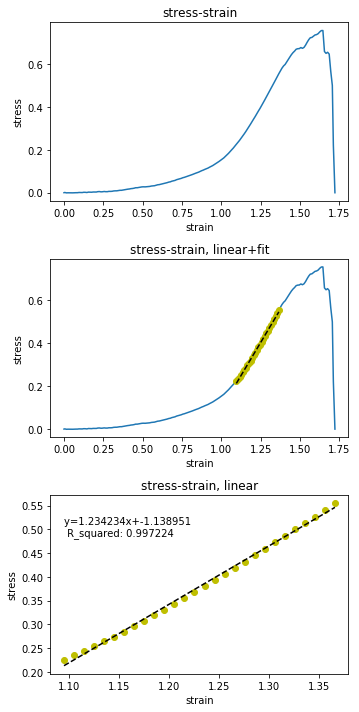

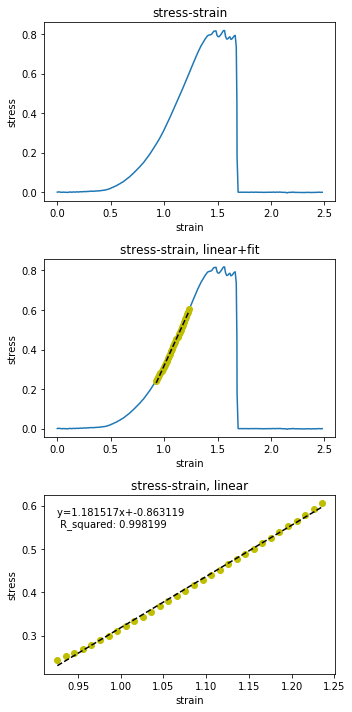

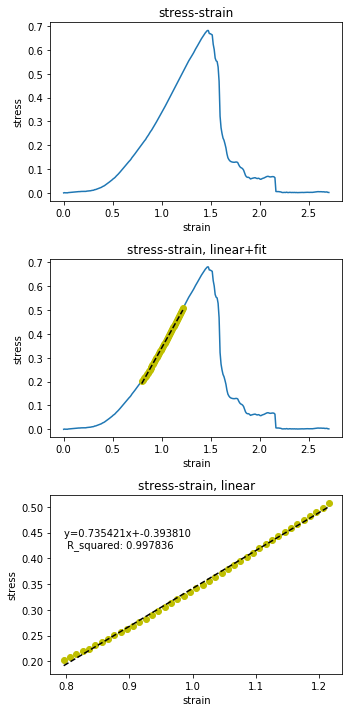

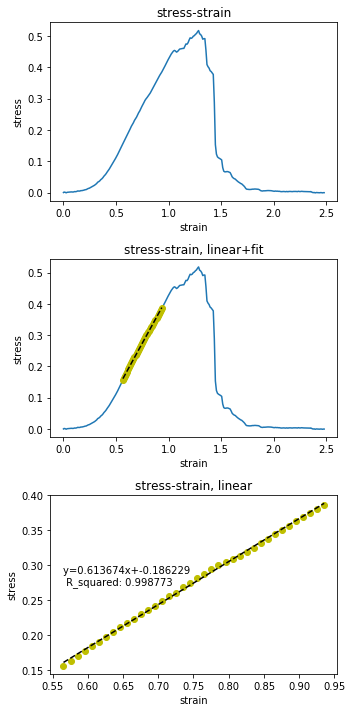

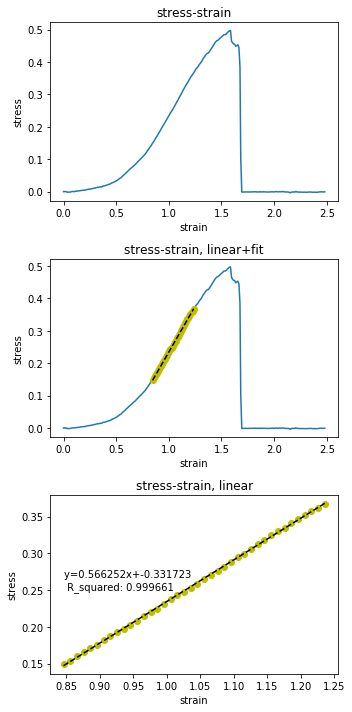

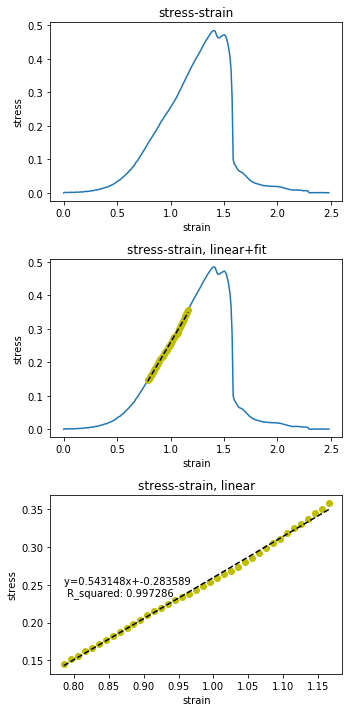

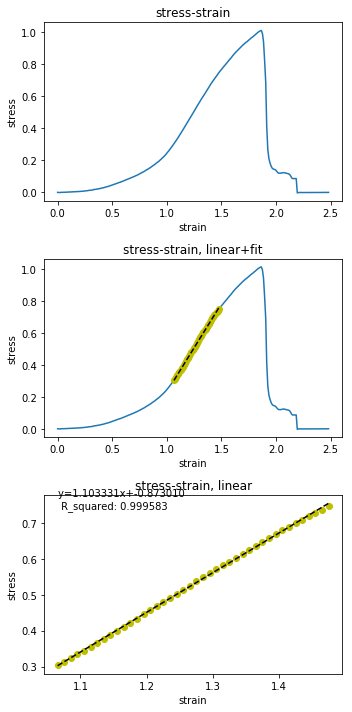

In [261]:
for item in queue:
    print(item[0])
    ym_workflow(item)

In [262]:
queue[0]

['stress-strain f13.csv', 10.0, 4.57]

In [263]:
#ex_to_load(queue[0][0],queue[0][1],queue[0][2])
ex_to_load('stress-strain f13.csv', 10.0, 4.57)

       Time  Extension     Load
0     0.000    0.00000  0.48640
1     0.100    0.04912  0.49093
2     0.200    0.15389  0.48244
3     0.300    0.25456  0.48423
4     0.400    0.35444  0.48316
5     0.500    0.45469  0.48225
6     0.600    0.55452  0.48301
7     0.700    0.65455  0.48502
8     0.800    0.75474  0.48595
9     0.900    0.85438  0.48612
10    1.000    0.95464  0.49073
11    1.100    1.05450  0.49014
12    1.200    1.15457  0.48901
13    1.300    1.25463  0.49510
14    1.400    1.35441  0.49420
15    1.500    1.45469  0.49022
16    1.600    1.55446  0.49863
17    1.700    1.65467  0.49767
18    1.800    1.75452  0.49609
19    1.900    1.85450  0.50080
20    2.000    1.95471  0.50173
21    2.100    2.05437  0.50044
22    2.200    2.15467  0.50873
23    2.300    2.25446  0.51023
24    2.400    2.35455  0.50419
25    2.500    2.45462  0.50669
26    2.600    2.55448  0.51186
27    2.700    2.65465  0.50777
28    2.800    2.75443  0.50801
29    2.900    2.85464  0.51448
..      

(       Time  Extension     Load  Adj Load  True Stress  True Strain
 0     0.000    0.00000  0.48640   0.00000     0.000000     0.000000
 1     0.100    0.04912  0.49093   0.00453     0.000991     0.004912
 2     0.200    0.15389  0.48244  -0.00396    -0.000867     0.015389
 3     0.300    0.25456  0.48423  -0.00217    -0.000475     0.025456
 4     0.400    0.35444  0.48316  -0.00324    -0.000709     0.035444
 5     0.500    0.45469  0.48225  -0.00415    -0.000908     0.045469
 6     0.600    0.55452  0.48301  -0.00339    -0.000742     0.055452
 7     0.700    0.65455  0.48502  -0.00138    -0.000302     0.065455
 8     0.800    0.75474  0.48595  -0.00045    -0.000098     0.075474
 9     0.900    0.85438  0.48612  -0.00028    -0.000061     0.085438
 10    1.000    0.95464  0.49073   0.00433     0.000947     0.095464
 11    1.100    1.05450  0.49014   0.00374     0.000818     0.105450
 12    1.200    1.15457  0.48901   0.00261     0.000571     0.115457
 13    1.300    1.25463  0.49510  